In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_client= pd.read_csv("/content/client_data (1).csv")

In [3]:
df_price= pd.read_csv("/content/price_data (1).csv")

In [4]:
df_client.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [7]:
# To see the rows and columns present in the client datset
df_client.shape

(14606, 26)

In [5]:
df_price.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [8]:
# To check the rows and columns present in the "price" dataset.
df_price.shape

(21978, 8)

In [9]:
# To check the data type of the client dataframe.
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [10]:
# To check the datatypes of column present in "Price" dataset
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21978 entries, 0 to 21977
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  21978 non-null  object 
 1   price_date          21977 non-null  object 
 2   price_off_peak_var  21977 non-null  float64
 3   price_peak_var      21977 non-null  float64
 4   price_mid_peak_var  21977 non-null  float64
 5   price_off_peak_fix  21977 non-null  float64
 6   price_peak_fix      21977 non-null  float64
 7   price_mid_peak_fix  21977 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1.3+ MB


In [11]:
# As our target variable is "churn", visualisation and whole analysis will take place
# with respect to "churn" variable.
df_client["churn"].value_counts()
#sns.boxplot(x= "")

,count
churn,
0,13187
1,1419


<Axes: xlabel='churn', ylabel='Count'>

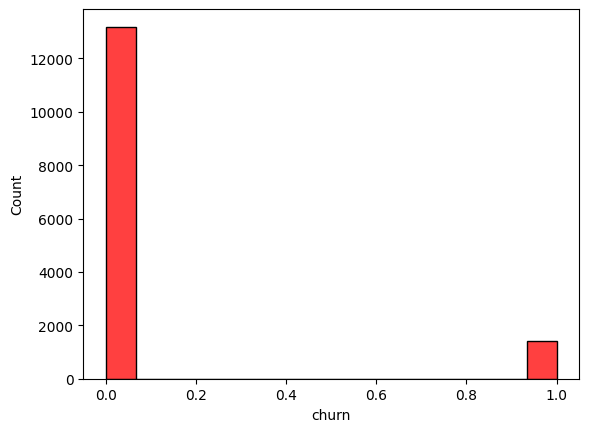

In [32]:
sns.histplot(x= "churn", data= df_client, color= "red")

From the above plot, one can notice that the customers with churn ratio(with 9.7%) is lesser than customers  with non-churn ratio(with 90.3%).
further to calculate the churn with respect to price, one can proceed with:

In [43]:
df_client[["forecast_price_energy_peak","churn"]].value_counts()

,,count
forecast_price_energy_peak,churn,
0.000000,0,6391
0.098837,0,652
0.000000,1,630
0.100123,0,537
0.100015,0,430
...,...,...
0.089118,0,1
0.088776,0,1
0.088553,0,1


<Axes: xlabel='forecast_price_energy_peak', ylabel='churn'>

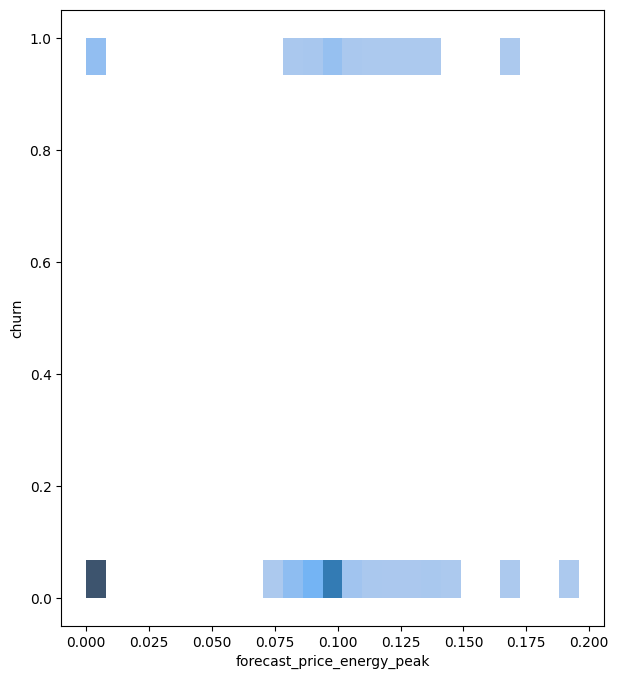

In [42]:
fig, ax = plt.subplots(figsize=(7, 8))
sns.histplot(x="forecast_price_energy_peak", y="churn", data= df_client, ax= ax )

AS we can see from the above plot, "forecast_price_energy_peak" with value ranges from 0.075 to 0.150 were the peaks where churns started increasing.